# The Impact of Mental Health on the presence of heart diseases

In [ ]:
#Importing relevent packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Reading and converting csv data in to data frame
df_raw_data=pd.read_csv('DataSet V4.csv',skipinitialspace = True)


In [649]:
#Getting column names
df_raw_data.columns

Index(['@_STATE', '@_AGE_G', 'PHYSHLTH', 'MENTHLTH', 'MENT14D', 'PHYS14D',
       'MEDCOST', 'EXERANY2', 'SLEPTIM1', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR',
       'CHCOCNCR', 'CHCCOPD2', 'HAVARTH4', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4',
       'MARITAL', 'EDUCA', 'VETERAN3', 'EMPLOY1', 'INCOME2', 'DECIDE',
       'DIFFWALK', 'SMOKDAY2', 'AVEDRNK3', 'HIVTST7', 'ACEDEPRS', 'ACEDIVRC',
       '@_URBSTAT', '@_SEX', '@_BMI5CAT', '@_MICHD'],
      dtype='object')

In [650]:
#Creating a dictionary for the state names
state_names_dict = {
    1:'Alabama',
    2:'Alaska',
    4:'Arizona',
    5:'Arkansas',
    6:'California',
    8:'Colorado',
    9:'Connecticut',
    10:'Delaware',
    11:'District of Columbia',
    12:'Florida',
    13:'Georgia',
    15:'Hawaii',
    16:'Idaho',
    17:'Illinois',
    18:'Indiana',
    19:'Iowa',
    20:'Kansas',
    21:'Kentucky',
    22:'Louisiana',
    23:'Maine',
    24:'Maryland',
    25:'Massachusetts',
    26:'Michigan',
    27:'Minnesota',
    28:'Mississippi',
    29:'Missouri',
    30:'Montana',
    31:'Nebraska',
    32:'Nevada',
    33:'New Hampshire',
    34:'New Jersey',
    35:'New Mexico',
    36:'New York',
    37:'North Carolina',
    38:'North Dakota',
    39:'Ohio',
    40:'Oklahoma',
    41:'Oregon',
    42:'Pennsylvania',
    44:'Rhode Island',
    45:'South Carolina',
    46:'South Dakota',
    47:'Tennessee',
    48:'Texas',
    49:'Utah',
    50:'Vermont',
    51:'Virginia',
    53:'Washington',
    54:'West Virginia',
    55:'Wisconsin',
    56:'Wyoming',
    66:'Guam',
    72:'Puerto Rico'
}
state_numbers=list(state_names_dict.keys())
state_names=list(state_names_dict.values())


In [651]:
#replacing state numbers with state names
df_raw_data['@_STATE'] = df_raw_data['@_STATE'].replace(state_numbers,state_names)
df_raw_data

,@_STATE,@_AGE_G,PHYSHLTH,MENTHLTH,MENT14D,PHYS14D,MEDCOST,EXERANY2,SLEPTIM1,CVDSTRK3,...,DIFFWALK,SMOKDAY2,AVEDRNK3,HIVTST7,ACEDEPRS,ACEDIVRC,@_URBSTAT,@_SEX,@_BMI5CAT,@_MICHD
0,Alabama,5,3.0,30.0,3,2,1.0,1.0,5.0,2.0,...,2.0,1.0,NaN,1.0,1.0,1.0,1.0,2,1.0,2.0
1,Alabama,6,88.0,88.0,1,1,1.0,1.0,7.0,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,1.0,2,3.0,2.0
2,Alabama,6,88.0,88.0,1,1,2.0,1.0,7.0,2.0,...,2.0,NaN,NaN,2.0,2.0,1.0,1.0,2,NaN,2.0
3,Alabama,6,88.0,88.0,1,1,2.0,2.0,6.0,2.0,...,2.0,NaN,NaN,2.0,2.0,2.0,1.0,2,NaN,2.0
4,Alabama,6,88.0,88.0,1,1,2.0,1.0,7.0,1.0,...,2.0,NaN,NaN,7.0,2.0,2.0,1.0,2,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,Puerto Rico,4,88.0,88.0,1,1,2.0,1.0,6.0,2.0,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,2,2.0,2.0
401954,Puerto Rico,2,88.0,88.0,1,1,2.0,2.0,12.0,2.0,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,2,4.0,2.0
401955,Puerto Rico,6,88.0,88.0,1,1,2.0,1.0,8.0,2.0,...,2.0,NaN,NaN,2.0,NaN,NaN,NaN,2,4.0,2.0
401956,Puerto Rico,5,88.0,88.0,1,1,2.0,1.0,6.0,2.0,...,2.0,NaN,2.0,1.0,NaN,NaN,NaN,1,3.0,2.0


In [652]:
#renaming column names
dic_names= {
    '@_STATE':'State',
    'PHYSHLTH':'Physical_Health',
    'MENTHLTH':'Mental_Health',
    'MEDCOST':'Medical_Cost',
    'EXERANY2':'Exercise',
    'SLEPTIM1':'Sleep_Time',
    'CVDSTRK3':'Stroke',
    'ASTHMA3':'Asthma',
    'CHCSCNCR':'Skin_Cancer',
    'CHCOCNCR':'Other_Cancer',
    'CHCCOPD2':'COPD/Chronic_Bronchitis',
    'HAVARTH4':'Arthritis',
    'ADDEPEV3':'Depressive_disorder',
    'CHCKDNY2':'Kidney_Diseases',
    'DIABETE4':'Diabetics',
    'MARITAL':'Marital_Status',
    'EDUCA':'Education_Level',
    'VETERAN3':'Veteran',
    'EMPLOY1':'Employment_Status',
    'INCOME2':'Income_Level',
    'DECIDE':'Concentration_Difficulty',
    'DIFFWALK':'Serious_Walking_Difficulty',
    'SMOKDAY2':'Smoking_Days',
    'AVEDRNK3':'Alcohol_Days',
    'HIVTST7':'HIV',
    'ACEDEPRS':'Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal',
    'ACEDIVRC':'Parents_Divorced/Seperated',
    "@_URBSTAT":'Urban/Rural_Status',
    "@_SEX":'Sex',
    "@_AGE_G":'Age',
    "@_BMI5CAT":'BMI',
    "@_MICHD":'Heart_Disease'}
df_raw_data.rename(columns = (dic_names),inplace= True,)
df_raw_data.columns

Index(['State', 'Age', 'Physical_Health', 'Mental_Health', 'MENT14D',
       'PHYS14D', 'Medical_Cost', 'Exercise', 'Sleep_Time', 'Stroke', 'Asthma',
       'Skin_Cancer', 'Other_Cancer', 'COPD/Chronic_Bronchitis', 'Arthritis',
       'Depressive_disorder', 'Kidney_Diseases', 'Diabetics', 'Marital_Status',
       'Education_Level', 'Veteran', 'Employment_Status', 'Income_Level',
       'Concentration_Difficulty', 'Serious_Walking_Difficulty',
       'Smoking_Days', 'Alcohol_Days', 'HIV',
       'Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal',
       'Parents_Divorced/Seperated', 'Urban/Rural_Status', 'Sex', 'BMI',
       'Heart_Disease'],
      dtype='object')

In [653]:
#Shape of the data frame
df_raw_data.shape

(401958, 34)

In [642]:
#Getting quick summary of dataframe
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 34 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   State                                                401958 non-null  object 
 1   Age                                                  401958 non-null  int64  
 2   Physical_Health                                      401953 non-null  float64
 3   Mental_Health                                        401953 non-null  float64
 4   MENT14D                                              401958 non-null  int64  
 5   PHYS14D                                              401958 non-null  int64  
 6   Medical_Cost                                         401955 non-null  float64
 7   Exercise                                             401955 non-null  float64
 8   Sleep_Time                                           4

In [643]:
#Checking for Null Values
df_raw_data.isnull().sum()

State                                                       0
Age                                                         0
Physical_Health                                             5
Mental_Health                                               5
MENT14D                                                     0
PHYS14D                                                     0
Medical_Cost                                                3
Exercise                                                    3
Sleep_Time                                                  3
Stroke                                                      3
Asthma                                                      3
Skin_Cancer                                                 3
Other_Cancer                                                3
COPD/Chronic_Bronchitis                                     5
Arthritis                                                   5
Depressive_disorder                                         6
Kidney_D

In [772]:
#Replacing NAN values with "999"
df_raw_data_fillna=df_raw_data.fillna(999)

## Veterans vs Heart Diseases related to Age

<AxesSubplot:title={'center':'Non-Veterans who age is below 45'}>

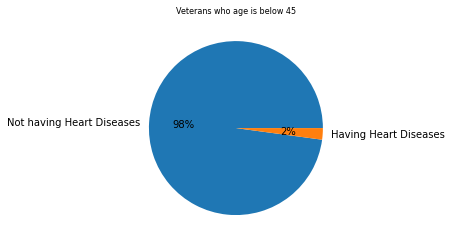

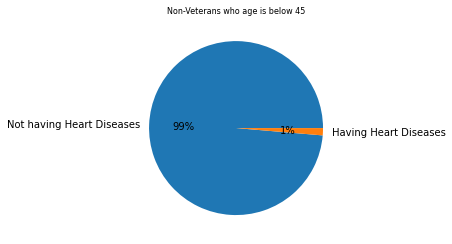

In [771]:
import matplotlib.pyplot as plt
temp_for_veteran=df_raw_data_fillna.loc[:,["Heart_Disease","Veteran","Age"]]

#Categorizing age group above 45 and below 45
temp_for_veteran['Age'] = temp_for_veteran['Age'].replace([1,2,3],"Below_45")
temp_for_veteran['Age'] = temp_for_veteran['Age'].replace([4,5,6],"Above_45")

#Getting only vetarans and non vetarans
df1=temp_for_veteran[temp_for_veteran["Veteran"]==1]
df2=temp_for_veteran[temp_for_veteran["Veteran"]==2]
df_veteran=pd.concat([df1, df2],ignore_index = True,sort = False)

#age over 45 and vetarans
#remove null values of heart disease column
df_veteran=df_veteran[df_veteran["Heart_Disease"]!=999]
#plotting pie chart 
# plt.subplot(20,2)

#plotting pie charts related to the veterans who age is below 45
df_veteran[df_veteran["Age"]=="Below_45"][df_veteran["Veteran"]==1].value_counts(normalize=True).plot(kind="pie",
    title='Veterans who age is below 45', autopct='%1.0f%%',
    labels=["Not having Heart Diseases","Having Heart Diseases"],ylabel="")

plt.figure()

#plotting pie charts related to non-veterans who age is below 45
df_veteran[df_veteran["Age"]=="Below_45"][df_veteran["Veteran"]==2].value_counts(normalize=True).plot(kind="pie",
    title='Non-Veterans who age is below 45', autopct='%1.0f%%',
    labels=["Not having Heart Diseases","Having Heart Diseases"],ylabel="")


<AxesSubplot:title={'center':'Non-Veterans who age is above 45'}>

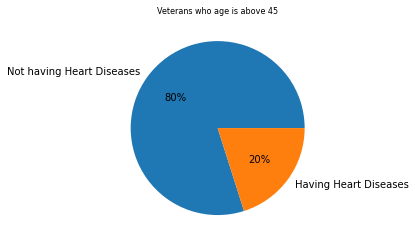

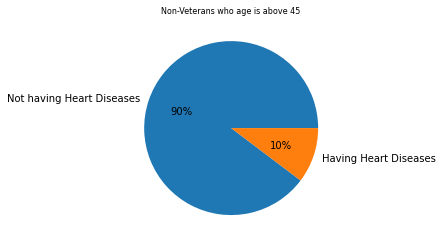

In [770]:
#plotting pie charts related to the veterans who age is above 45
df_veteran[df_veteran["Age"]=="Above_45"][df_veteran["Veteran"]==1].value_counts(normalize=True).plot(kind="pie",
    title='Veterans who age is above 45', autopct='%1.0f%%',
    labels=["Not having Heart Diseases","Having Heart Diseases"],ylabel="")

plt.figure()

#plotting pie charts related to the non-veterans who age is above 45
df_veteran[df_veteran["Age"]=="Above_45"][df_veteran["Veteran"]==2].value_counts(normalize=True).plot(kind="pie",
    title='Non-Veterans who age is above 45', autopct='%1.0f%%',
    labels=["Not having Heart Diseases","Having Heart Diseases"],ylabel="")


## Preparing Data related to Heart Diseases

In [413]:
#Getting data frame including only binary data of heart disease column
df1=df_raw_data_fillna[df_raw_data_fillna["Heart_Disease"]==1]
df2=df_raw_data_fillna[df_raw_data_fillna["Heart_Disease"]==2]
df3=pd.concat([df1, df2],ignore_index = True,sort = False)
df3

,State,Age,Physical_Health,Mental_Health,MENT14D,PHYS14D,Medical_Cost,Exercise,Sleep_Time,Stroke,...,Serious_Walking_Difficulty,Smoking_Days,Alcohol_Days,HIV,Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal,Parents_Divorced/Seperated,Urban/Rural_Status,Sex,BMI,Heart_Disease
0,Alabama,6,6.0,88.0,1,2,2.0,2.0,12.0,2.0,...,1.0,3.0,999.0,2.0,1.0,2.0,1.0,2,3.0,1.0
1,Alabama,5,30.0,88.0,1,3,2.0,2.0,15.0,2.0,...,1.0,1.0,999.0,2.0,2.0,1.0,1.0,1,4.0,1.0
2,Alabama,6,10.0,88.0,1,2,2.0,1.0,4.0,1.0,...,1.0,3.0,999.0,2.0,2.0,2.0,1.0,1,4.0,1.0
3,Alabama,6,88.0,88.0,1,1,2.0,2.0,7.0,2.0,...,1.0,999.0,999.0,2.0,2.0,2.0,1.0,2,3.0,1.0
4,Alabama,6,6.0,2.0,2,2,2.0,1.0,8.0,2.0,...,1.0,3.0,999.0,7.0,2.0,2.0,1.0,2,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398382,Puerto Rico,4,88.0,88.0,1,1,2.0,1.0,6.0,2.0,...,2.0,999.0,999.0,1.0,999.0,999.0,999.0,2,2.0,2.0
398383,Puerto Rico,2,88.0,88.0,1,1,2.0,2.0,12.0,2.0,...,2.0,999.0,999.0,1.0,999.0,999.0,999.0,2,4.0,2.0
398384,Puerto Rico,6,88.0,88.0,1,1,2.0,1.0,8.0,2.0,...,2.0,999.0,999.0,2.0,999.0,999.0,999.0,2,4.0,2.0
398385,Puerto Rico,5,88.0,88.0,1,1,2.0,1.0,6.0,2.0,...,2.0,999.0,2.0,1.0,999.0,999.0,999.0,1,3.0,2.0


In [414]:
#Check whether the target variable is balanced or not
df3["Heart_Disease"].value_counts()


2.0    364224
1.0     34163
Name: Heart_Disease, dtype: int64

As the value counts of target attribute are not balanced we had to balance data as following. 

### Balancing Data 

In [415]:
def balancing_data():
    # importing random undersampling and other necessary libraries 
    from collections import Counter
    from imblearn.under_sampling import RandomUnderSampler
    from sklearn.model_selection import train_test_split
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # Separating the independent variables from dependent variables
    X = df3.iloc[:,:-1]

    # Separating the dependent variables from dependent variables
    y = df3.iloc[:,-1]

    #Splitting train-test Data
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=2)

    # summarizing class distribution
    print("Before undersampling: ", Counter(y_train))

    # definning undersampling strategy
    undersample = RandomUnderSampler(sampling_strategy='majority',random_state=2)

    # fitting and applying the transform
    X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

    # summarizing class distribution
    print("After undersampling: ", Counter(y_train_under))

    df_balanced=X_train_under
    df_balanced["Heart_Disease"]=y_train_under
    df_balanced

In [416]:
#Calling fuction to balance data
balancing_data()

Before undersampling:  Counter({2.0: 254794, 1.0: 24076})
After undersampling:  Counter({1.0: 24076, 2.0: 24076})


### Checking unique values of each column

In [417]:
# Getting column names to a list
col_balanced=list(df_balanced.columns)

# Printing unique values of each column
for name in col_balanced:
    unique_col_val=list(df_balanced[name].unique())
    print(name, ":",unique_col_val)


State : ['Vermont', 'New York', 'California', 'Utah', 'Illinois', 'Oregon', 'Maryland', 'Iowa', 'Kansas', 'West Virginia', 'Nebraska', 'Hawaii', 'Puerto Rico', 'Wisconsin', 'Georgia', 'Massachusetts', 'Arkansas', 'New Hampshire', 'Ohio', 'Virginia', 'Arizona', 'Mississippi', 'Wyoming', 'Washington', 'Delaware', 'Texas', 'Indiana', 'Alabama', 'Florida', 'Idaho', 'New Mexico', 'Pennsylvania', 'Minnesota', 'Maine', 'Louisiana', 'Missouri', 'South Carolina', 'Connecticut', 'Tennessee', 'Nevada', 'New Jersey', 'District of Columbia', 'North Dakota', 'North Carolina', 'Alaska', 'Montana', 'Colorado', 'Kentucky', 'South Dakota', 'Oklahoma', 'Michigan', 'Guam', 'Rhode Island']
Age : [6, 4, 3, 5, 2, 1]
Physical_Health : [88.0, 3.0, 30.0, 20.0, 99.0, 10.0, 77.0, 2.0, 21.0, 7.0, 1.0, 14.0, 12.0, 25.0, 5.0, 15.0, 16.0, 28.0, 4.0, 23.0, 6.0, 27.0, 29.0, 8.0, 9.0, 24.0, 18.0, 26.0, 17.0, 19.0, 13.0, 22.0, 11.0, 999.0]
Mental_Health : [88.0, 5.0, 30.0, 77.0, 15.0, 1.0, 3.0, 10.0, 2.0, 20.0, 4.0, 99.0

After analyzing all the unique values, we realized that there are specific values for non-related values that have to be removed from each column. So we had to develop some new algorithms to clean data from each column in order to do exploratory data analysis. (EDA) 

In [418]:
#replacing values in diabetics column
df_balanced["Diabetics"].replace(3,1,inplace=True)

We have replaced value "3" with "1" as both give same meaning.

# Exploratory Data Analysis

## EDA for Mental Health

### Categorizing Attributes

In [419]:
#creating separate list that non-related values of each column are equal to 77,99 
l1=["Sleep_Time",'Income_Level',"Alcohol_Days"] 

#creating separate list that non-related values of each column are equal to 7,9 
l2=[ 'Medical_Cost', "Exercise",'Stroke','Asthma', 'Skin_Cancer', 'Other_Cancer', 'COPD/Chronic_Bronchitis', 'Arthritis', 'Depressive_disorder',
       'Kidney_Diseases', 'Diabetics', 'Veteran', 'Concentration_Difficulty', 'Serious_Walking_Difficulty', "Smoking_Days",'HIV',
       'Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal',"Urban/Rural_Status","Sex","Age","BMI" ] 

#creating separate list that non-related values of each column are equal to 9
l3=['Marital_Status', 'Education_Level', "Employment_Status",'Parents_Divorced/Seperated'] 

#creating separate list that non-related values of each column are equal to 88
l4=["Physical_Health"] 


Input_list=l1+l2+l3+l4

Input_list

['Sleep_Time',
 'Income_Level',
 'Alcohol_Days',
 'Medical_Cost',
 'Exercise',
 'Stroke',
 'Asthma',
 'Skin_Cancer',
 'Other_Cancer',
 'COPD/Chronic_Bronchitis',
 'Arthritis',
 'Depressive_disorder',
 'Kidney_Diseases',
 'Diabetics',
 'Veteran',
 'Concentration_Difficulty',
 'Serious_Walking_Difficulty',
 'Smoking_Days',
 'HIV',
 'Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal',
 'Urban/Rural_Status',
 'Sex',
 'Age',
 'BMI',
 'Marital_Status',
 'Education_Level',
 'Employment_Status',
 'Parents_Divorced/Seperated',
 'Physical_Health']

After categorizing attributes to separated lists we decided to implement EDA with two parts related to mental health and heart diseases.

## EDA only on Mental Health Factors

After removing all non-related values of each column, only rest of other necessary unique values were considered to plot each attribute with mental health. Here, we had to develop a method as follows in order to get the relationship between only mental health and each attribute. One of the most critical requirements that we identified is calculating percentage is more accurate rather than getting value count as values of each attribute are not balanced. Therefore separated methods have been introduced to calculate percentage values and plot those values. Further we have devided the code to analyze categorical and continuous 
attributes separately. 

In [420]:
# Arranging Target attribute by removing un-necessary valuesx

def arrange_ment(data):
    data = data[data["Mental_Health"] != 77]
    data = data[data["Mental_Health"] != 99]
    data = data[data["Mental_Health"] != 88]
    data = data[data["Mental_Health"] != 999]
    return data

data=arrange_ment(df_balanced)

data

,State,Age,Physical_Health,Mental_Health,MENT14D,PHYS14D,Medical_Cost,Exercise,Sleep_Time,Stroke,...,Serious_Walking_Difficulty,Smoking_Days,Alcohol_Days,HIV,Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal,Parents_Divorced/Seperated,Urban/Rural_Status,Sex,BMI,Heart_Disease
1,New York,4,3.0,5.0,2,2,2.0,1.0,7.0,2.0,...,7.0,3.0,1.0,1.0,999.0,999.0,1.0,1,4.0,1.0
2,California,3,30.0,30.0,3,3,1.0,1.0,18.0,2.0,...,1.0,1.0,16.0,1.0,999.0,999.0,1.0,1,4.0,1.0
9,West Virginia,4,20.0,5.0,2,3,2.0,2.0,5.0,2.0,...,1.0,2.0,2.0,1.0,999.0,999.0,1.0,1,4.0,1.0
12,Puerto Rico,6,88.0,15.0,3,1,2.0,1.0,5.0,2.0,...,2.0,3.0,999.0,2.0,999.0,999.0,999.0,1,2.0,1.0
15,Georgia,5,30.0,30.0,3,3,1.0,2.0,9.0,2.0,...,1.0,1.0,999.0,2.0,2.0,1.0,1.0,1,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48134,New York,3,88.0,5.0,2,1,2.0,1.0,8.0,2.0,...,2.0,999.0,3.0,2.0,999.0,999.0,1.0,2,3.0,2.0
48144,Kansas,6,88.0,5.0,2,1,2.0,1.0,7.0,2.0,...,1.0,999.0,999.0,2.0,999.0,999.0,1.0,2,2.0,2.0
48148,Nebraska,2,88.0,5.0,2,1,2.0,1.0,10.0,2.0,...,2.0,999.0,2.0,2.0,999.0,999.0,1.0,2,4.0,2.0
48149,North Carolina,2,1.0,4.0,2,2,2.0,1.0,8.0,2.0,...,2.0,3.0,1.0,2.0,999.0,999.0,1.0,1,3.0,2.0


(array([4572., 2616.,  862., 1606., 1786.,   77.,  808.,   33.,  345.,
        3421.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

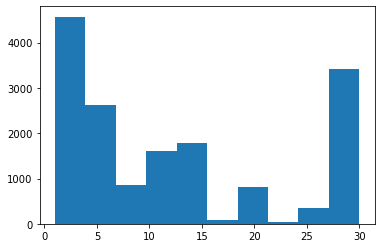

In [421]:
#Data Distribution of "MENTHLTH" column
plt.hist(data["Mental_Health"])

According to the above graph, data has been unevenly distributed for mental health attribute.

In [422]:
#Getting unique values of mental health
count_uni_mental=list(data["Mental_Health"].unique())
count_uni_mental.sort()
count_uni_mental

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0]

### Defining Methods

In [423]:
#Defining Slope Method

def slope(df_temp,veryweak,weak,moderate,slightly_strong,strong,v):
    
    coefficients, residuals, _, _, _ = np.polyfit(range(len(df_temp.index)),df_temp,1,full=True)
    slope=coefficients[0]
    if slope>0 and slope <=0.2:
        veryweak.append(v)
    elif slope>0.2 and slope <=0.4:
        weak.append(v)
    elif slope>0.4 and slope <=0.6:
        moderate.append(v)
    elif slope>0.6 and slope <=0.8:
        slightly_strong.append(v)
    elif slope>0.8 :
        strong.append(v)
        
    return veryweak,weak,moderate,slightly_strong,strong,coefficients


In [424]:
#Definning method for calculating percentages
def percentage(data,No_need):
        
        data1=data
        #removing unnecessary values of attributes
        index=[]
        for noNeed in No_need:
            data1 = data1[data1[Input_list[i]] != noNeed]
        
        #calling "arrange_ment" method to get only necessary values
        data1=arrange_ment(data1)
        
        #getting only necessary unique values in to a list
        count_uni=list(data1[Input_list[i]].unique())  
        
        #creating new dictionary
        new_d={}
        index=count_uni
        
        #calculate percentages related to each day of mental helath attribute
        for count_uni_mental_value in count_uni_mental:
            
            data2=data1
            data2 = data2[data2["Mental_Health"] == count_uni_mental_value]
      
            #creating a list in order to calculate each percentage
            l=[]
            tot=0
            
            #calculating percentages related only for the necessary values of each attribute.
            for count in count_uni: #1,2,3,4
                
                df_temp=data2[data2[Input_list[i]]==count]
                ment_count=df_temp["Mental_Health"].count()
                l.append(ment_count)
                tot=tot+ment_count
            
            per_list=[]
            for value in range(len(l)):
                
                if l[value]:
                    per=(l[value]/tot)*100
                    per_list.append(per) 
                else:
                    per_list.append(0) 
            
            #merging percentages in to a dictionary
            new_d[count_uni_mental_value]=per_list
            
        #creating new dataframe with two attributes(mental health and attribute that we want to plot) 
        diff_perc=pd.DataFrame(new_d,index=index)
        diff_perc=diff_perc.transpose()
    
        return(index,diff_perc)  

In [539]:
#Definning method for plotting all graphs
def plot_graph(diff_perc,index):

#Defining necessary parameters

    vw=[] #very weak
    w=[] #weak
    m=[] #moderate
    ss=[] #slightly strong
    s=[] #strong
    all_dic={}
    all_dic[Input_list[i]]=[vw,w,m,ss,s]
    slope_list=[]
    intercept_list=[]
    slope_value=[]
    for v in index:
        #calling slope() method and getting slope of each unique values of attributes
        vw,w,m,ss,s,coefficients=slope(diff_perc[v],vw,w,m,ss,s,v)
        slope_list.append(coefficients[0])
        intercept_list.append(coefficients[1])
        slope_value.append(v)
     
    #Filtering attributes which slope is greater than or equal to 0.4 
    max_slope=max(slope_list)
    if max_slope>=0.4:
        plt.figure()
        slope_max_index=slope_list.index(max_slope)
        required_slope=slope_value[slope_max_index]
        intercept=intercept_list[slope_max_index]
        
        #Getting equation of trend line
        x1=diff_perc.index
        y1=max_slope*x1+intercept
        
        #Plotting graphs and trend lines
        plt.plot(diff_perc[required_slope],marker='o', markerfacecolor='black', markersize=4,label=required_slope,color="blue")
        plt.plot(x1,y1, linestyle='dashed',color="orange")
        plt.ylabel(Input_list[i])
        plt.xlabel("No of Days per month that someone is having mental issues")
        plt.suptitle("The percentage of "+Input_list[i]+" category "+str(required_slope))
        plt.title("Gradient : "+str(max_slope) )
        plt.rc('axes', labelsize=10)
        plt.rc('axes', titlesize=8) 

    plt.legend()  

    all_dic[Input_list[i]]=[vw,w,m,ss,s]
    #Getting values of the dictionary in to list
    result_slope=list(all_dic.values())
    result_slope=result_slope[0]
    

    #Defining slope parameters
    res_list=["very Weak","Weak","Moderate","Slightly strong","Strong"]
    
    result_dic={}
    data_list=[]
    
    for result in range(len(result_slope)):

        #defining condition to for slope(>=1 means -> "Weak","Moderate","Slightly strong","Strong" )
        if result_slope[result] and result >=2:
            
            #creating temporary list 
            temp_list=[res_list[result],"->",result_slope[result]]
            data_list.append(temp_list)
            
           
    #Assigning data_list in to each attribute
    result_dic[Input_list[i]]=data_list
    
    if result_dic[Input_list[i]]:
        
        #Assigning each dictionary in to a list
        final_res.append(result_dic)
        
        #Getting necessary attributr names
        names_need.append(Input_list[i])


In [540]:
#creating "attributes" function to implement other functions related to categorized list
def attributes (attribute):
    if attribute in l1:
        #Defining a list including non related values that have to be removed
        No_need=[77,99,999]
        
        #calling method
        index,diff_perc=percentage(df_balanced,No_need)
        plot_graph(diff_perc,index)
        
    elif attribute in l2:
        
        No_need=[7,9,999]
        index,diff_perc=percentage(df_balanced,No_need)
        plot_graph(diff_perc,index)
        
    elif attribute in l3:
        
        No_need=[9,999]
        index,diff_perc=percentage(df_balanced,No_need)
        plot_graph(diff_perc,index)
        
    elif attribute in l4:
        
        No_need=[88,999]
        index,diff_perc=percentage(df_balanced,No_need)
        plot_graph(diff_perc,index)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


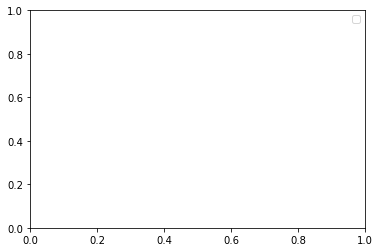

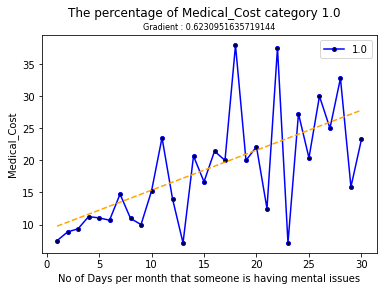

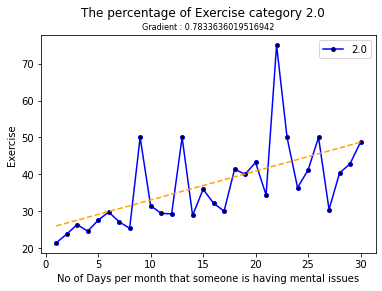

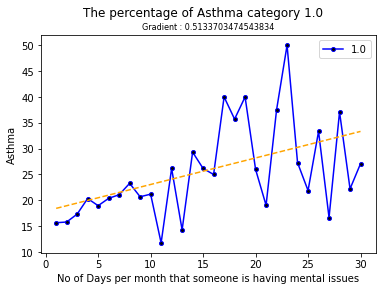

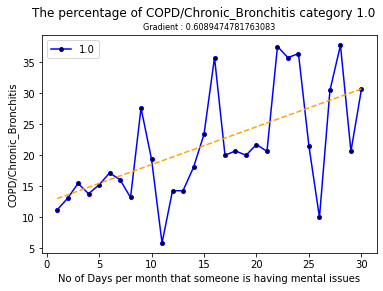

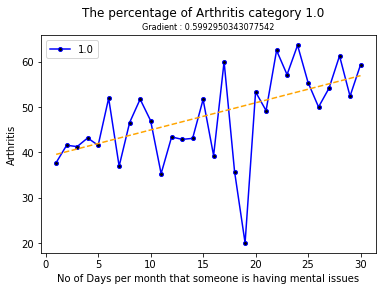

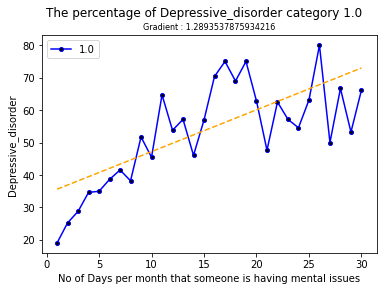

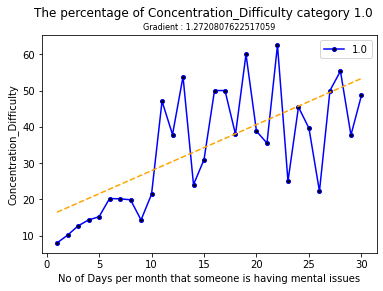

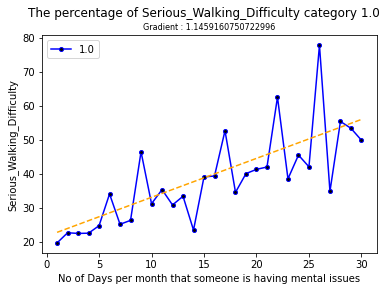

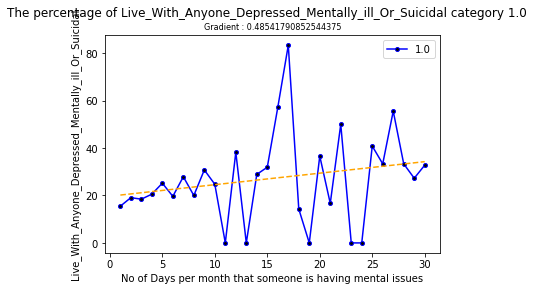

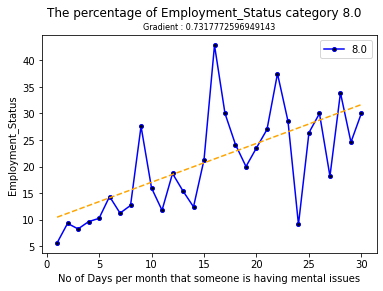

In [541]:
# calling "attributes" function to find the relationship between mental health and other attributes
  
import warnings
warnings.filterwarnings("ignore")
names_need=[]
final_res=[]
for i in range(len(Input_list)):
    attributes(Input_list[i])



In [622]:
#Getting final result with only values that are relted with mental health.
final_res,len(final_res)

([{'Medical_Cost': [['Slightly strong', '->', [1.0]]]},
  {'Exercise': [['Slightly strong', '->', [2.0]]]},
  {'Asthma': [['Moderate', '->', [1.0]]]},
  {'COPD/Chronic_Bronchitis': [['Slightly strong', '->', [1.0]]]},
  {'Arthritis': [['Moderate', '->', [1.0]]]},
  {'Depressive_disorder': [['Strong', '->', [1.0]]]},
  {'Concentration_Difficulty': [['Strong', '->', [1.0]]]},
  {'Serious_Walking_Difficulty': [['Strong', '->', [1.0]]]},
  {'Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal': [['Moderate',
     '->',
     [1.0]]]},
  {'Employment_Status': [['Slightly strong', '->', [8.0]]]}],
 10)

In [543]:
#Creating new data frame with all above taken attributes including mental health column.
mental_data=df_balanced.loc[:,names_need+["Heart_Disease"]]
mental_data

,Medical_Cost,Exercise,Asthma,COPD/Chronic_Bronchitis,Arthritis,Depressive_disorder,Concentration_Difficulty,Serious_Walking_Difficulty,Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal,Employment_Status,Heart_Disease
0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,999.0,7.0,1.0
1,2.0,1.0,2.0,2.0,1.0,1.0,1.0,7.0,999.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,999.0,8.0,1.0
3,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,1.0
4,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,999.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
48147,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,999.0,1.0,2.0
48148,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,999.0,6.0,2.0
48149,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,999.0,1.0,2.0
48150,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,999.0,7.0,2.0


# prediction

### One Hot Encoding

In [544]:
from sklearn.preprocessing import LabelBinarizer

#creating empty data frame
df_new=pd.DataFrame()

for i in range(len(final_res)):
    
    temp_list=list(final_res[i].values())
    
    count=value_list=len(temp_list[0])
    for j in range(count):
        value_list=temp_list[0][j][2]
    
    col_name=list(final_res[i].keys())[0]
    
    #one-hot encoding 
    obj=LabelBinarizer()
    result=obj.fit_transform(mental_data[col_name])
    
    #getting transform
    result=result.T
    obj_list=list(obj.classes_)

    for val in value_list:
        
        if val in obj_list:
            index=obj_list.index(val)
            
            #creating dataframe with new column names
            df_temp=pd.DataFrame(data=result[index],columns=[col_name+"_"+str(val)+"_yes"])      
            #merging dataframes
            df_new = pd.concat([df_new, df_temp], axis=1, join='outer')
df_new




,Medical_Cost_1.0_yes,Exercise_2.0_yes,Asthma_1.0_yes,COPD/Chronic_Bronchitis_1.0_yes,Arthritis_1.0_yes,Depressive_disorder_1.0_yes,Concentration_Difficulty_1.0_yes,Serious_Walking_Difficulty_1.0_yes,Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal_1.0_yes,Employment_Status_8.0_yes
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0
2,1,0,1,1,1,1,1,1,0,1
3,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
48147,0,1,0,0,0,0,0,0,0,0
48148,0,0,1,0,0,0,0,0,0,0
48149,0,0,0,0,0,0,0,0,0,0
48150,0,0,0,0,1,0,0,0,0,0


### Chi-Square Method

In [545]:
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X, y = load_dataset(df_new)
chi2_selector = SelectKBest(chi2, k=2)

X_kbest = chi2_selector.fit_transform(X, y)
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape,"\n")
print("Scores of Features :","\n")
column_names=df_new.columns
for i in range(len(fs.scores_)):
    print(column_names[i]," :", fs.scores_[i])




Original number of features: (48152, 9)
Reduced number of features: (48152, 2) 

Scores of Features : 

Medical_Cost_1.0_yes  : 8.24527310973382
Exercise_2.0_yes  : 574.6202860587231
Asthma_1.0_yes  : 149.44719491832535
COPD/Chronic_Bronchitis_1.0_yes  : 1702.7413174104627
Arthritis_1.0_yes  : 1490.662510311379
Depressive_disorder_1.0_yes  : 155.98006165527005
Concentration_Difficulty_1.0_yes  : 457.30150522303006
Serious_Walking_Difficulty_1.0_yes  : 2076.9268874487816
Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal_1.0_yes  : 9.463852185880851
Employment_Status_8.0_yes  : 635.2457777182906


According to the scores taken from chi-square method, following columns have been removed.

    1. Medical_Cost_1.0_yes
    2. Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal_1.0_yes
    

## EDA for Heart Diseases

In [546]:
#replacing values in Heart_Disease column
df_new["Heart_Disease"]=mental_data["Heart_Disease"]
df_new["Heart_Disease"].replace(2,0,inplace=True)
df_new

,Medical_Cost_1.0_yes,Exercise_2.0_yes,Asthma_1.0_yes,COPD/Chronic_Bronchitis_1.0_yes,Arthritis_1.0_yes,Depressive_disorder_1.0_yes,Concentration_Difficulty_1.0_yes,Serious_Walking_Difficulty_1.0_yes,Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal_1.0_yes,Employment_Status_8.0_yes,Heart_Disease
0,0,0,0,1,0,0,0,0,0,0,1.0
1,0,0,0,0,1,1,1,0,0,0,1.0
2,1,0,1,1,1,1,1,1,0,1,1.0
3,0,0,0,0,1,1,0,0,0,0,1.0
4,0,0,0,0,1,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
48147,0,1,0,0,0,0,0,0,0,0,0.0
48148,0,0,1,0,0,0,0,0,0,0,0.0
48149,0,0,0,0,0,0,0,0,0,0,0.0
48150,0,0,0,0,1,0,0,0,0,0,0.0


In [615]:
Input_list_new=list(df_new.columns)
Input_list_new

['Medical_Cost_1.0_yes',
 'Exercise_2.0_yes',
 'Asthma_1.0_yes',
 'COPD/Chronic_Bronchitis_1.0_yes',
 'Arthritis_1.0_yes',
 'Depressive_disorder_1.0_yes',
 'Concentration_Difficulty_1.0_yes',
 'Serious_Walking_Difficulty_1.0_yes',
 'Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal_1.0_yes',
 'Employment_Status_8.0_yes',
 'Heart_Disease']

In [616]:
#After exploratory analysis we have selected only below categorical attributes to develop model

d={}
temp={}
for i in range(len(Input_list_new)):
    #Getting each column by dividing 1(yes) and 2(no) 
    df_temp_yes=df_new[df_new[Input_list_new[i]]==1]
    df_temp_no=df_new[df_new[Input_list_new[i]]==0]
 
    #Finding percentage whether person is having heart diseases related to "yes"
    c1=df_temp_yes[df_temp_yes["Heart_Disease"]==1]["Heart_Disease"].count()
    c2=df_temp_yes[df_temp_yes["Heart_Disease"]==0]["Heart_Disease"].count()
    c_per1=c1/(c1+c2)*100
    
    #Finding percentage whether person is having heart diseases related to "No" 
    c3=df_temp_no[df_temp_no["Heart_Disease"]==1]["Heart_Disease"].count()
    c4=df_temp_no[df_temp_no["Heart_Disease"]==0]["Heart_Disease"].count()
    c_per2=c3/(c3+c4)*100
    
    
    #Calculating percentage difference 
    diff=c_per1-c_per2
    #Filtering attributes which are related with heart diseases
    if diff>8:
        d[Input_list_new[i]]=diff
    else:
        temp[Input_list_new[i]]=diff

features=list(d.keys())
scores=list(d.values())
for feature in features:
    print(feature," : ",scores[features.index(feature)])
print("Features with less scores : ",temp)

Exercise_2.0_yes  :  17.186900336110767
Asthma_1.0_yes  :  9.91558725641876
COPD/Chronic_Bronchitis_1.0_yes  :  34.144454562873115
Arthritis_1.0_yes  :  28.372369815901635
Depressive_disorder_1.0_yes  :  9.588377600193681
Concentration_Difficulty_1.0_yes  :  18.884800129752406
Serious_Walking_Difficulty_1.0_yes  :  33.44459562683246
Employment_Status_8.0_yes  :  24.97282482222076
Heart_Disease  :  100.0
Features with less scores :  {'Medical_Cost_1.0_yes': 3.458580345294429, 'Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal_1.0_yes': -3.500806721963052}


According to the calculated percentages following columns have been removed because of less percentages.

        1. Medical_Cost_1.0_yes
        2. Live_With_Anyone_Depressed_Mentally_ill_Or_Suicidal_1.0_yes
Here, we have got the same results after doing chi-square method and EDA analysis.Then these attributes which have impact on both mental and heart diseases, have been taken to develop machine learning model.

In [575]:
#Getting machine learning input list
ML_Input_list=list(d.keys())
ML_Input_list

['Exercise_2.0_yes',
 'Asthma_1.0_yes',
 'COPD/Chronic_Bronchitis_1.0_yes',
 'Arthritis_1.0_yes',
 'Depressive_disorder_1.0_yes',
 'Concentration_Difficulty_1.0_yes',
 'Serious_Walking_Difficulty_1.0_yes',
 'Employment_Status_8.0_yes',
 'Heart_Disease']

# Machine Learning Prediction Model

In [576]:
#creating data frame to implement machine learning model
ML_data=df_new.loc[:,ML_Input_list]
ML_data.columns

Index(['Exercise_2.0_yes', 'Asthma_1.0_yes', 'COPD/Chronic_Bronchitis_1.0_yes',
       'Arthritis_1.0_yes', 'Depressive_disorder_1.0_yes',
       'Concentration_Difficulty_1.0_yes',
       'Serious_Walking_Difficulty_1.0_yes', 'Employment_Status_8.0_yes',
       'Heart_Disease'],
      dtype='object')

In [577]:
#Defining x and y for the machine learning model
df_ml_temp=ML_data
x=df_ml_temp.drop("Heart_Disease",axis=1)
y=df_ml_temp["Heart_Disease"]


### Data Splitting

In [578]:
#splitting training and test data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=2)

## Cross Validation

In [558]:
#creating temporary data frame
df_need_temp=ML_data
y=df_need_temp["Heart_Disease"]

#importing necessary packages
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

#creating models
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
nb1=MultinomialNB()
nb2=BernoulliNB()
lr=LogisticRegression()
svm=SVC()

models=[knn,rf,nb1,nb2,lr]
scores=[]
for model1 in models:
    score=cross_val_score(model1,x,y,cv=5).mean()
    scores.append(score)
print(scores)

[0.5074970459811273, 0.6766904573141443, 0.6219902415756147, 0.6591832858868143, 0.6785594393666263]


In [559]:
#Checking score for SVM
cross_val_score(svm,x,y,cv=5).mean()

0.6793694039011486

Here, Random Forest, logistic regression and SVM gave nearly same scores after cross validation. As our data set is consisted with categorical attributes and after considering pros and cons of each model, Random Forest was selected as the best method to proceed machine learning model.

## Random Forest Method

In [579]:
#Using random forest Algorithms
from sklearn.ensemble import RandomForestClassifier

# model=RandomForestClassifier(n_estimators=50)
model=RandomForestClassifier()
model.fit(x_train,y_train)

pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

#checking the accuracy

from sklearn.metrics import accuracy_score

print("Training Score : ",model.score(x_train,y_train))
print("Training Score : ",accuracy_score(y_train,pred_train))

print("Testing  Score : ",model.score(x_test,y_test))
print("Testing  Score : ",accuracy_score(y_test,pred_test))


Training Score :  0.6817480567258055
Training Score :  0.6817480567258055
Testing  Score :  0.6777654714107711
Testing  Score :  0.6777654714107711


### Confusion Metrix before parameter tunning

In [610]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)

print(cf_matrix)

[[4719 2504]
 [2170 5053]]


## Hyper parameter optimization for Random Forest

In [595]:
#no of trees
n_estimators=[int(x) for x in np.linspace(start=10,stop=80,num=10)]

#no of features to consider every split
max_features=["auto","sqrt"]

#maximum no of levels in trees
max_depth=[2,4]

#minimum no of samples required to split a node
min_samples_split=[2,5]

#minimum no of samples required at each leaf node
min_samples_leaf=[1,2]

#method for selecting samples for training each tree
bootstrap=[True,False]


In [596]:
#creating the parameters of grid
param_grid={"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth
            ,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf,"bootstrap":bootstrap}


In [597]:
#Definning the model
rf_Model=RandomForestClassifier()

In [603]:
from sklearn.model_selection import GridSearchCV
rf_Grid=GridSearchCV(estimator=rf_Model,param_grid=param_grid,cv=5,n_jobs=4)

In [604]:
#Fitting the model
rf_Grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]})

In [607]:
#Getting best parameters
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 56}

In [608]:
#check Accuracy
print("Training Score after tunning : ",rf_Grid.score(x_train,y_train))
print("Testing Score after tunning  : ",rf_Grid.score(x_test,y_test))


Training Score after tunning :  0.6792559188275085
Testing Score after tunning  :  0.6766578983801744


In [609]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, rf_Grid.predict(x_test))
cf_matrix

array([[4744, 2479],
       [2192, 5031]], dtype=int64)

In [611]:
#Using random forest Algorithms
from sklearn.ensemble import RandomForestClassifier

# model=RandomForestClassifier(n_estimators=50)


model=RandomForestClassifier(n_estimators=41,bootstrap=False,max_depth=4, max_features='sqrt',min_samples_leaf=1,min_samples_split=5)
model.fit(x_train,y_train)

pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

#checking the accuracy

from sklearn.metrics import accuracy_score

print("Training Score : ",model.score(x_train,y_train))
print("Training Score : ",accuracy_score(y_train,pred_train))

print("Testing  Score : ",model.score(x_test,y_test))
print("Testing  Score : ",accuracy_score(y_test,pred_test))


Training Score :  0.6792559188275085
Training Score :  0.6792559188275085
Testing  Score :  0.6766578983801744
Testing  Score :  0.6766578983801744


In [612]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)

print(cf_matrix)

[[4744 2479]
 [2192 5031]]


* True values before parameter tunning : 9772
* True values after parameter tunning : 9775

After tunning parameters testing score has been increased in a small value.
    

## Save and Load Model

In [613]:
#Save Model

import pickle
with open("rfmodel1.pickle","wb") as file:
    pickle.dump(model,file)

In [614]:
#Load Model

with open("rfmodel1.pickle","rb") as file:
    model_read=pickle.load(file)


# Prediction Model

In [613]:
if model_read.predict([Input_predict[0]]):
    print("Probability for having heart diseases")
else:
    print("No probability for having heart diseases")

Probability for having heart diseases


In [621]:
#Defining inputs for the prediction
Input_predict=[1,1,0,0,0,1,0,1]

#Getting the prediction
if model_read.predict([Input_predict]):
    print("Risk for having heart diseases")
else:
    print("No Risk for having heart diseases")

Risk for having heart diseases
